In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

DATA_PATH = 'transcriptomic_preproc'
RANDOM_STATE = 42

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
adata = sc.read(DATA_PATH) # data already preprocess
adata

AnnData object with n_obs × n_vars = 247976 × 2789
    obs: 'dataset', 'disease', 'cell_type', 'sample', 'patient_id', 'time', 'cell_types_labels', 'patient', 'MS/HC', 'n_genes', 'percent_mito', 'n_counts'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

### Clustering

In [3]:
sc.tl.pca(
    adata,
    svd_solver='arpack',
    n_comps=30,
    random_state=RANDOM_STATE
    )

In [4]:
sc.pp.neighbors(adata, n_neighbors=50, random_state=RANDOM_STATE)

In [5]:
sc.tl.umap(adata, random_state=RANDOM_STATE)

In [6]:
highest_expr_genes = ['LINC02362', 'CLNK', 'HBA1', 'TRAV6', 'CCDC171', 'AC108066.2', 'GK', 'SH3PXD2A', 'LIMK2', 'PTCH1']

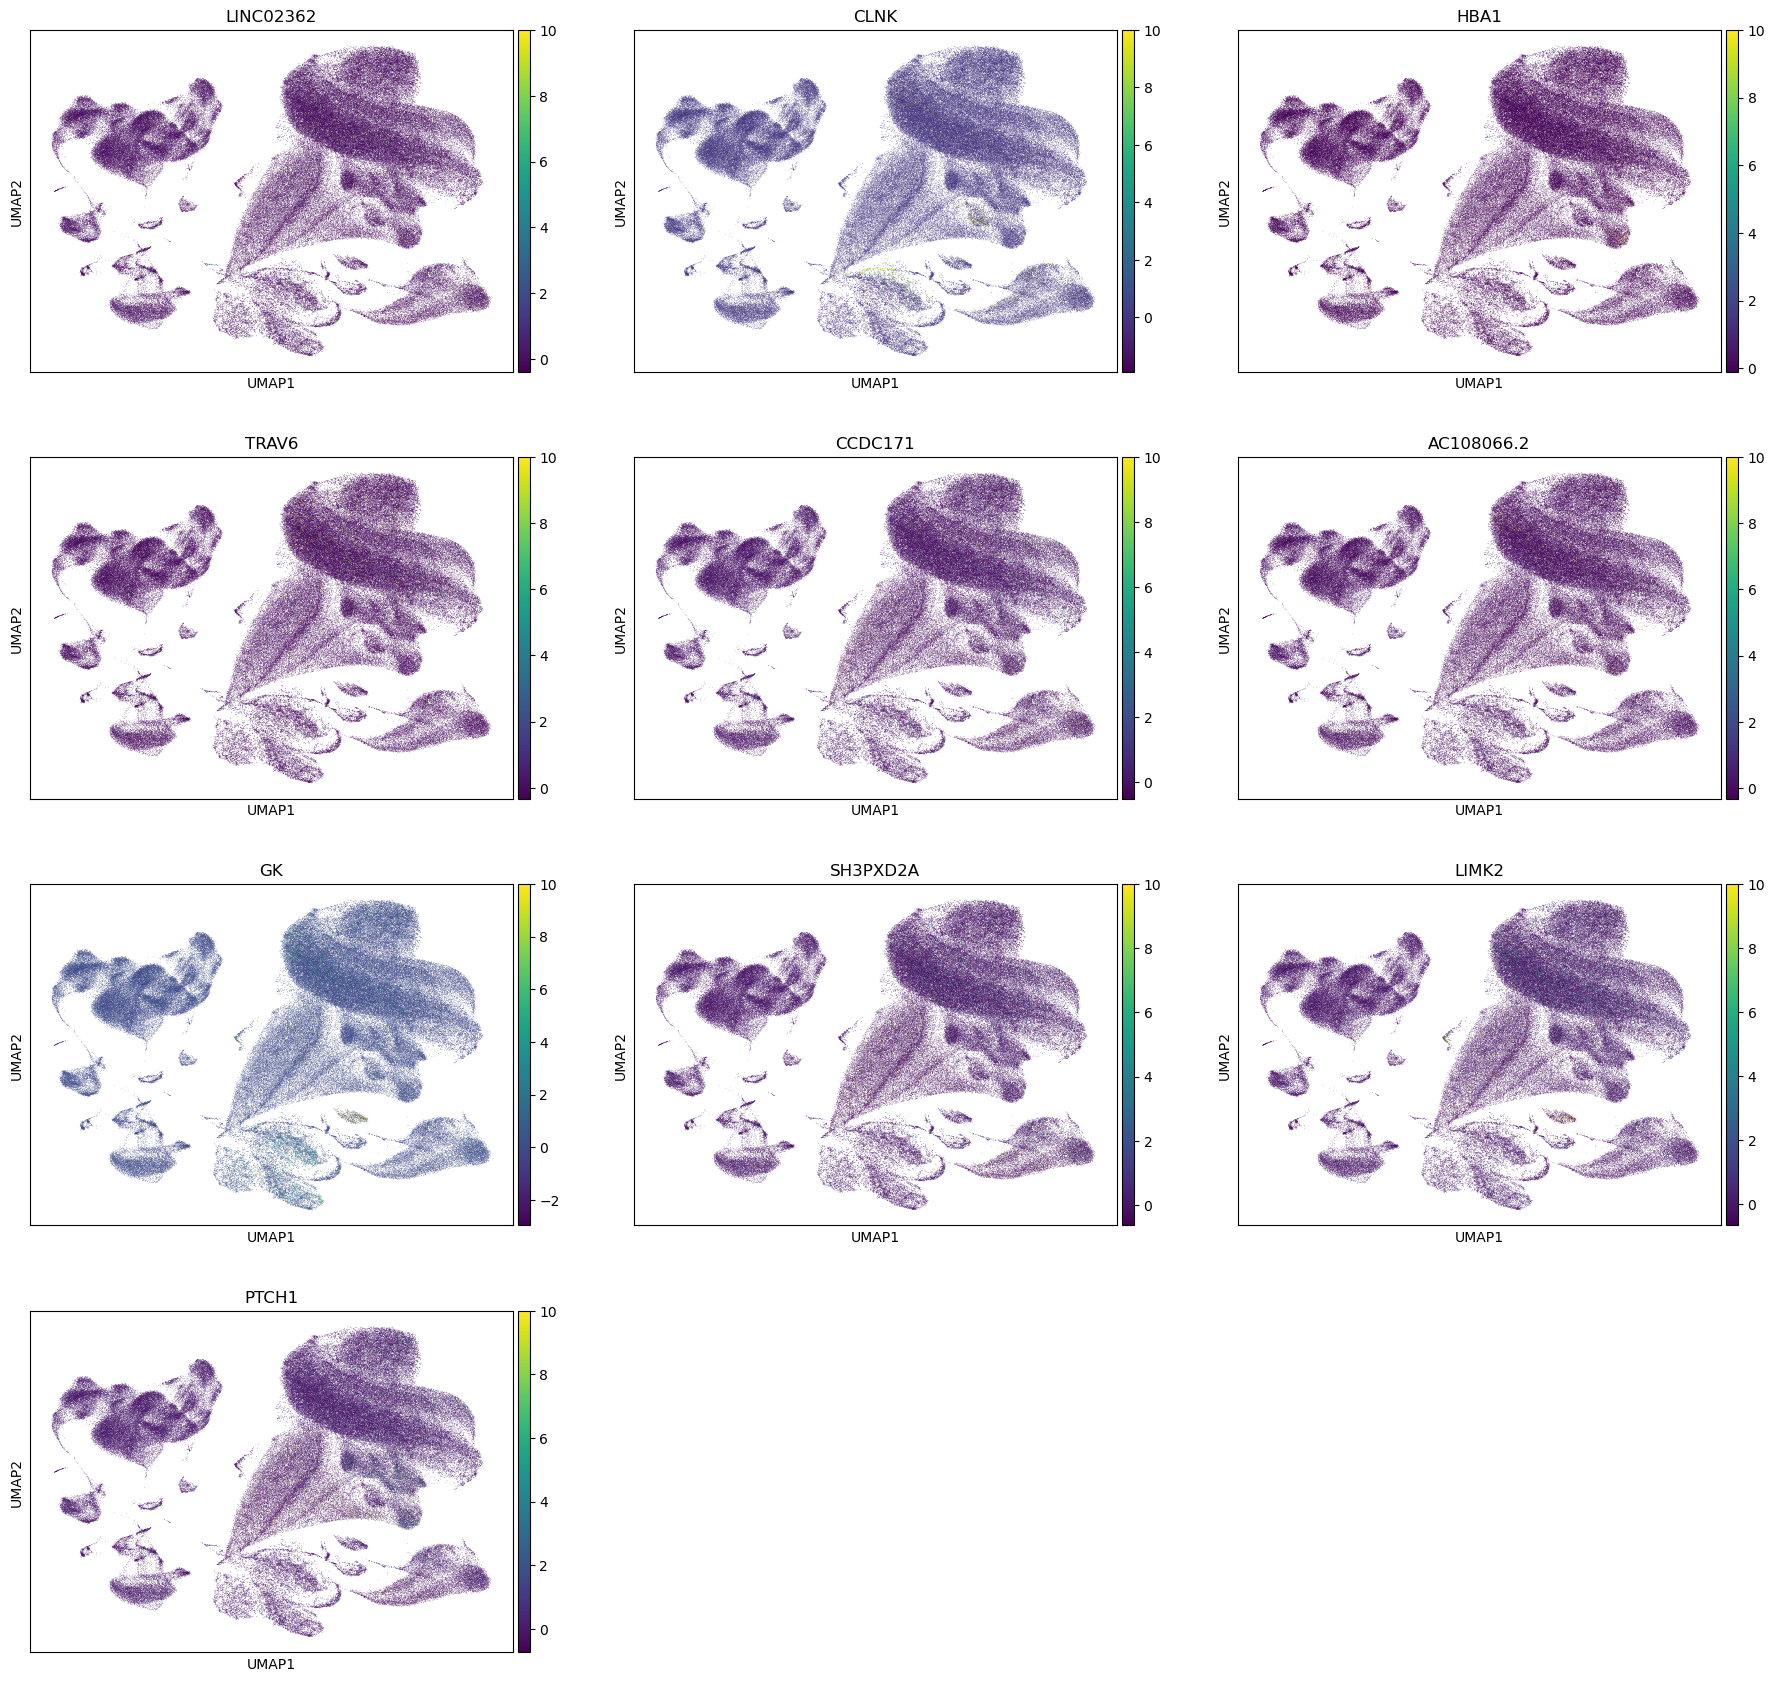

In [7]:
sc.pl.umap(adata, color=highest_expr_genes, use_raw=False, ncols=3)

In [8]:
sc.tl.leiden(adata, resolution=0.3, random_state=RANDOM_STATE) # high resolution to get more clusters

C:\Users\giuli\AppData\Local\Temp\ipykernel_9448\902550085.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.3, random_state=RANDOM_STATE) # high resolution to get more clusters


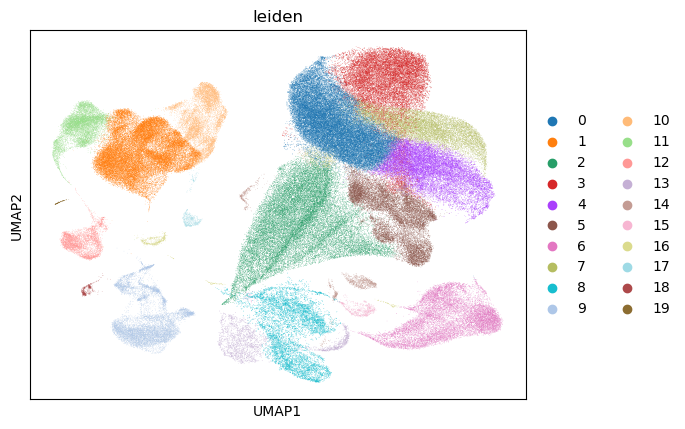

In [9]:
sc.pl.umap(adata, color=['leiden'])

In [23]:
adata.obs['leiden'].to_csv('results/trainscriptomic_leiden_clusters.csv')

### Finding markers gene

In [10]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test', random_state=RANDOM_STATE)

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\giuli\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\giuli\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\giuli\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\giuli\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\giuli\anaconda3\lib\site-packages\scanpy\tools\_rank_gen

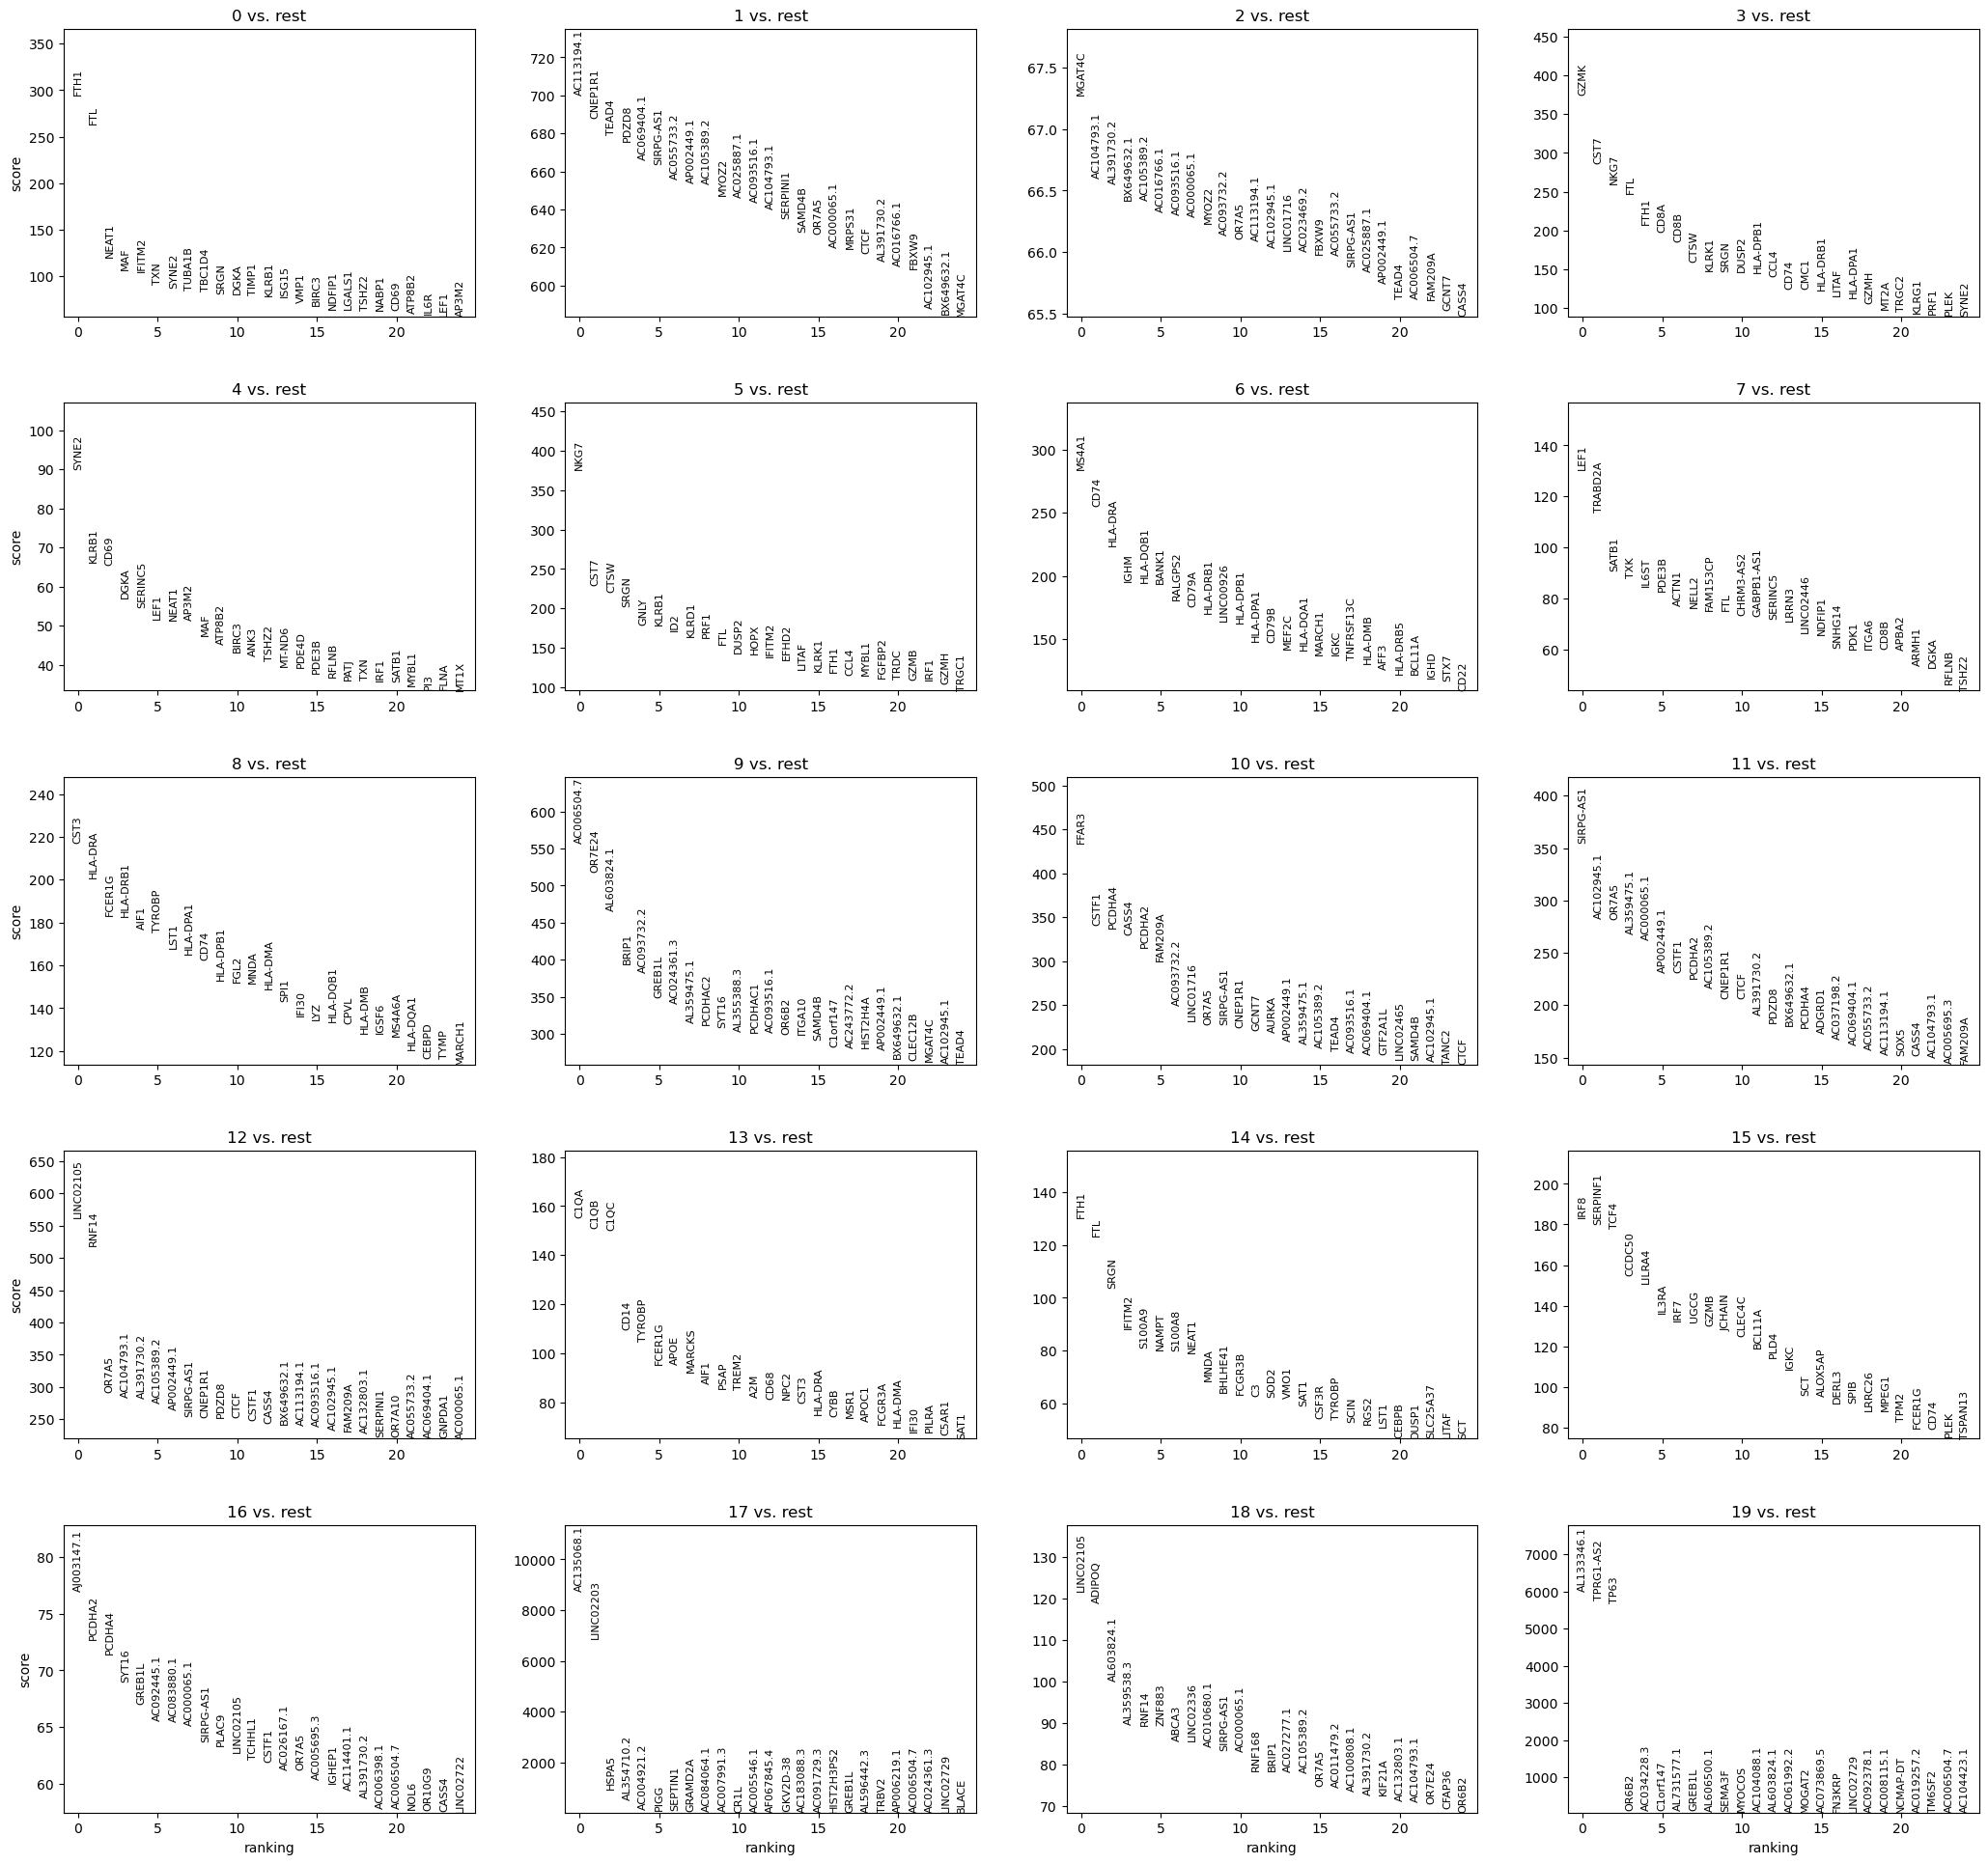

In [11]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [12]:
pd.DataFrame(adata.uns['rank_genes_groups']['names'])

0           1           2           3        4           5  \
0           FTH1  AC113194.1      MGAT4C        GZMK    SYNE2        NKG7   
1            FTL     CNEP1R1  AC104793.1        CST7    KLRB1        CST7   
2          NEAT1       TEAD4  AL391730.2        NKG7     CD69        CTSW   
3            MAF       PDZD8  BX649632.1         FTL     DGKA        SRGN   
4         IFITM2  AC069404.1  AC105389.2        FTH1  SERINC5        GNLY   
...          ...         ...         ...         ...      ...         ...   
2784  AP002449.1       NEAT1      MARCH1   SIRPG-AS1     CPVL  AL391730.2   
2785  AC055733.2        SRGN   LINC00926  AC055733.2     SPI1  AC104793.1   
2786  AC105389.2      IFITM2    ARHGAP24  AC105389.2    MEF2C  AC102945.1   
2787  AC102945.1        FTH1       BANK1  AC102945.1   TYROBP       OR7A5   
2788       OR7A5         FTL       MS4A1       OR7A5   FCER1G  AC105389.2   

             6           7         8           9      10          11  \
0        MS4A1        LEF1      CST3  AC006504.7   FFAR3   SIRPG-AS1   
1         CD74     TRABD2A   HLA-DRA      OR7E24   CSTF1  AC102945.1   
2      HLA-DRA       SATB1    FCER1G  AL603824.1  PCDHA4       OR7A5   
3         IGHM         TXK  HLA-DRB1       BRIP1   CASS4  AL359475.1   
4     HLA-DQB1       IL6ST      AIF1  AC093732.2  PCDHA2  AC000065.1   
...        ...         ...       ...         ...     ...         ...   
2784       ID2       OR7A5     KLRK1        GZMK    SRGN        GZMK   
2785       TXK  AL391730.2      CD69       LITAF   LITAF       LITAF   
2786      GZMK  AC104793.1     KLRB1        CST7    CST7        CST7   
2787      SRGN  AC105389.2      LEF1        FTH1    FTH1        FTH1   
2788      CTSW      MGAT4C     SYNE2         FTL     FTL         FTL   

              12      13          14        15          16          17  \
0      LINC02105    C1QA        FTH1      IRF8  AJ003147.1  AC135068.1   
1          RNF14    C1QB         FTL  SERPINF1      PCDHA2   LINC02203   
2          OR7A5    C1QC        SRGN      TCF4      PCDHA4       HSPA5   
3     AC104793.1    CD14      IFITM2    CCDC50       SYT16  AL354710.2   
4     AL391730.2  TYROBP      S100A9    LILRA4      GREB1L  AC004921.2   
...          ...     ...         ...       ...         ...         ...   
2784       LITAF    CTSW  AC105389.2     APOC2        CD69        CD69   
2785        GZMK   KLRK1  AC102945.1    TRAJ50       CLIC3       DUSP2   
2786        FTH1    HOPX       OR7A5    ADIPOQ       KLRK1        NKG7   
2787        CST7   SYNE2  AP002449.1     CEBPB        CST7        CST7   
2788         FTL    LEF1  AC000065.1      OLR1        CTSW        GZMK   

              18          19  
0      LINC02105  AL133346.1  
1         ADIPOQ   TPRG1-AS2  
2     AL603824.1        TP63  
3     AL359538.3       OR6B2  
4          RNF14  AC034228.3  
...          ...         ...  
2784        CCL4        CST7  
2785       DUSP2        DHFR  
2786        CST7        NKG7  
2787        NKG7        GZMK  
2788        GZMK       RAB13  

[2789 rows x 20 columns]

In [18]:
# dict with cluster number as key and the genes as values
cluster_genes = {}
for cluster in pd.DataFrame(adata.uns['rank_genes_groups']['names']).columns:
    cluster_genes[cluster] = pd.DataFrame(adata.uns['rank_genes_groups']['names'])[cluster].tolist()[:10]

In [24]:
with open('results/transcriptomic_cluster_genes.json', 'w') as f:
    json.dump(cluster_genes, f)

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


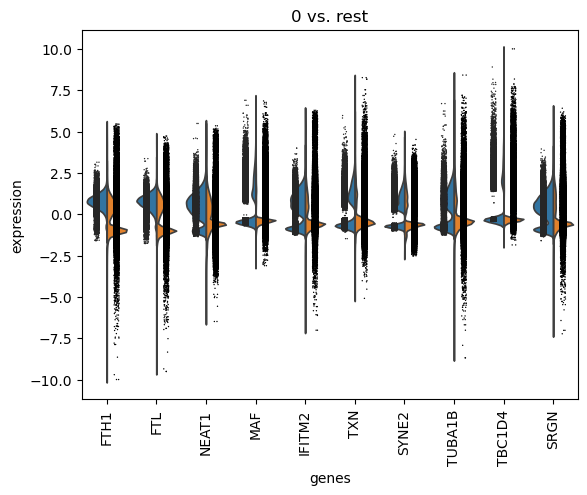

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


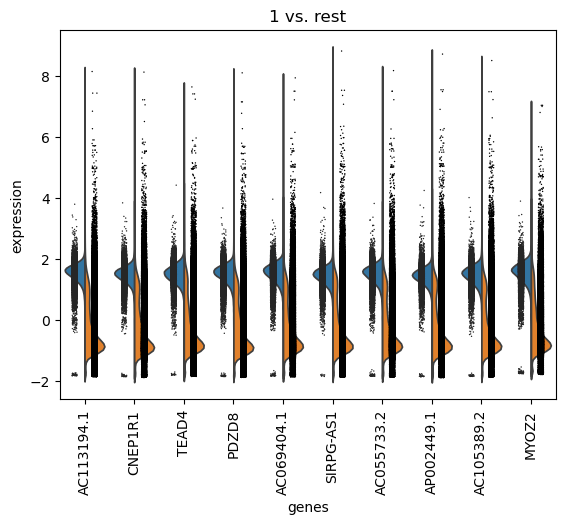

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


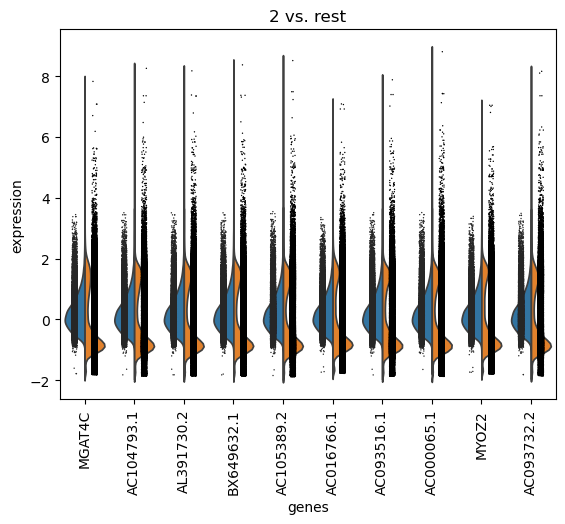

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


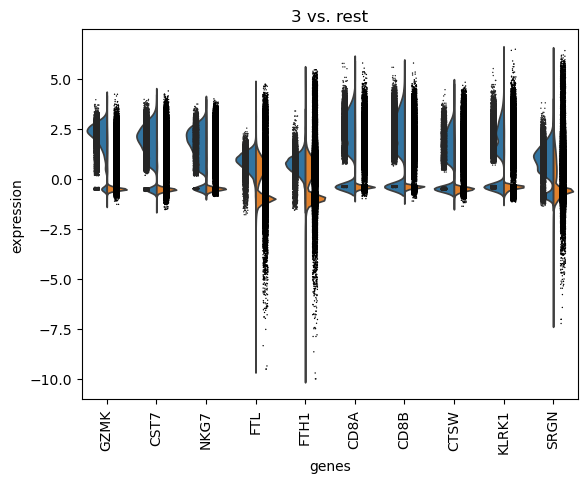

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


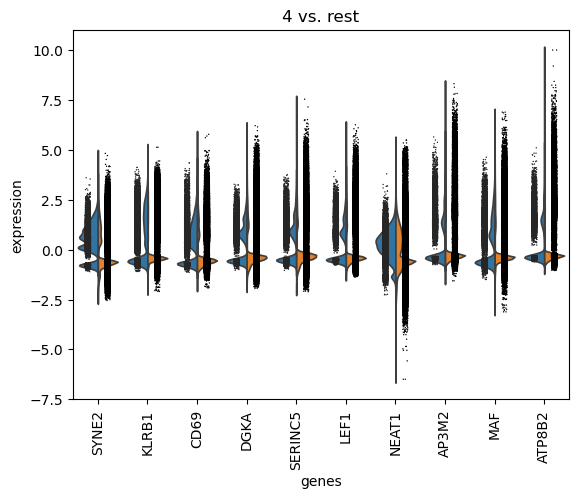

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


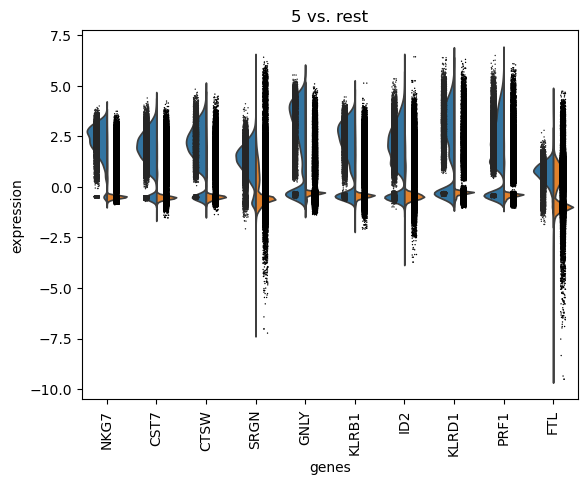

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


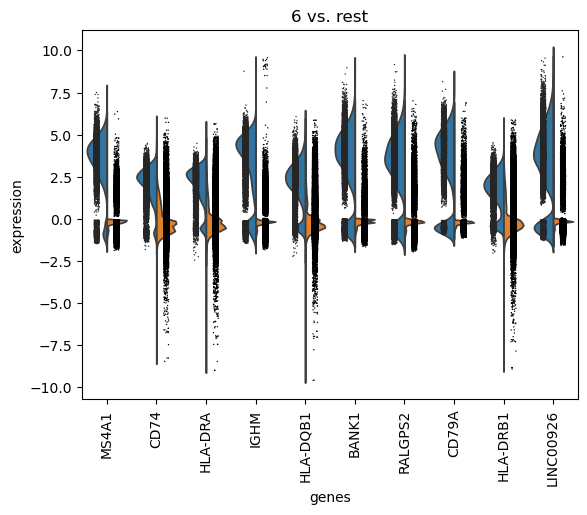

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


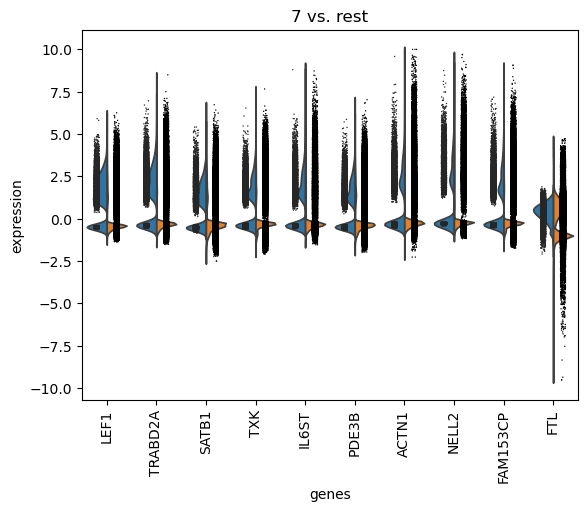

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


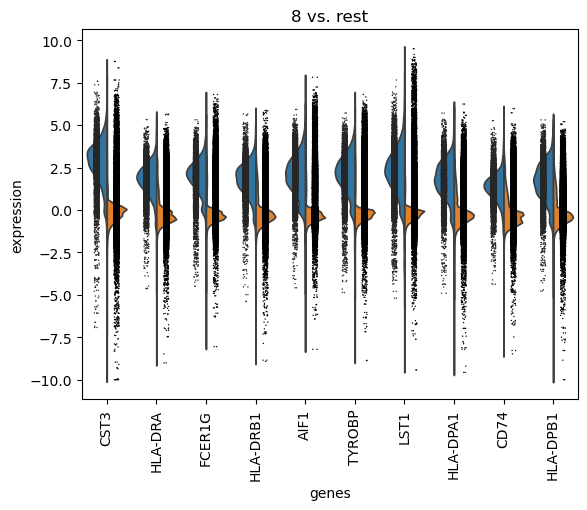

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


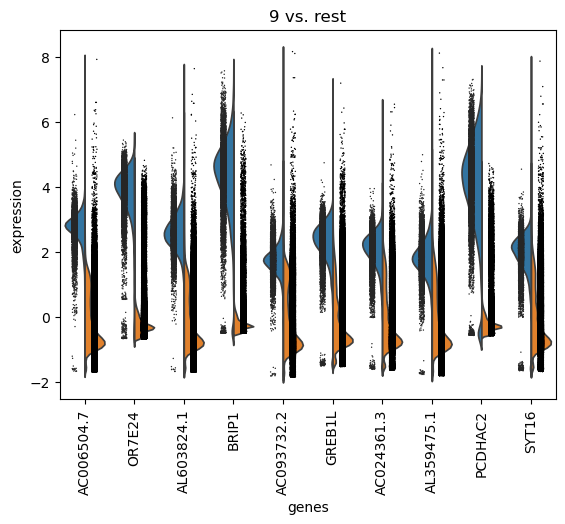

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


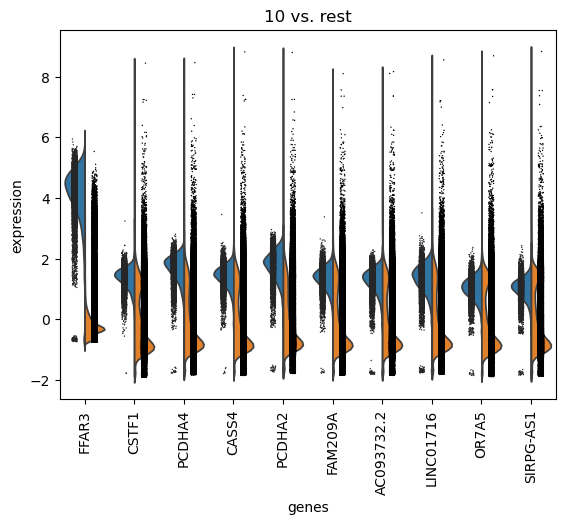

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


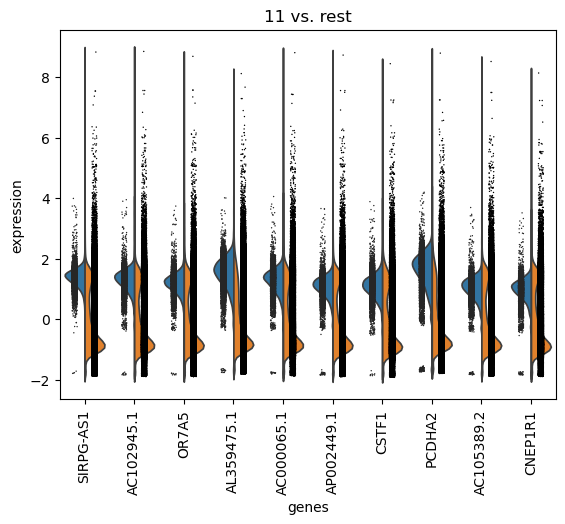

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


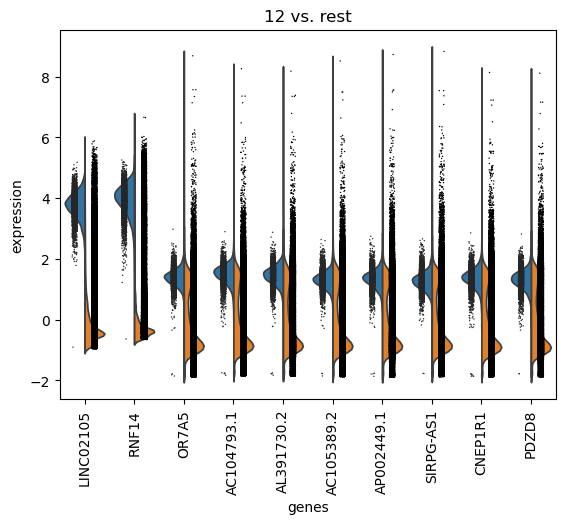

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


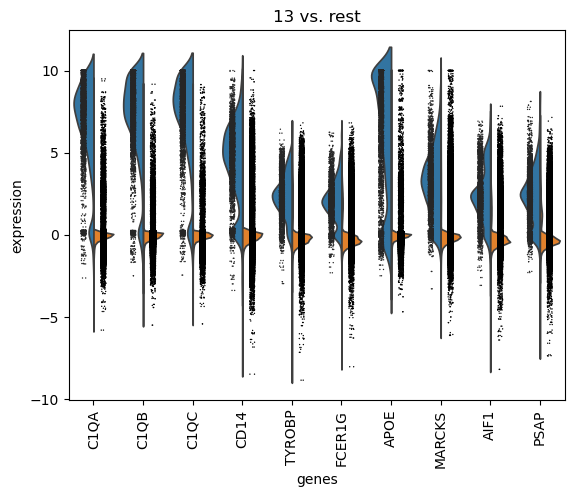

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


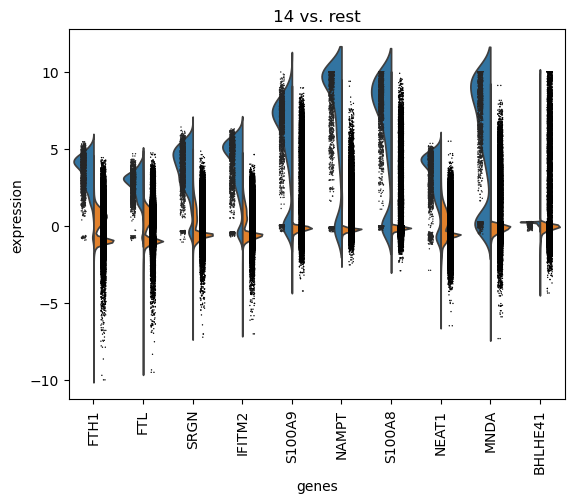

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


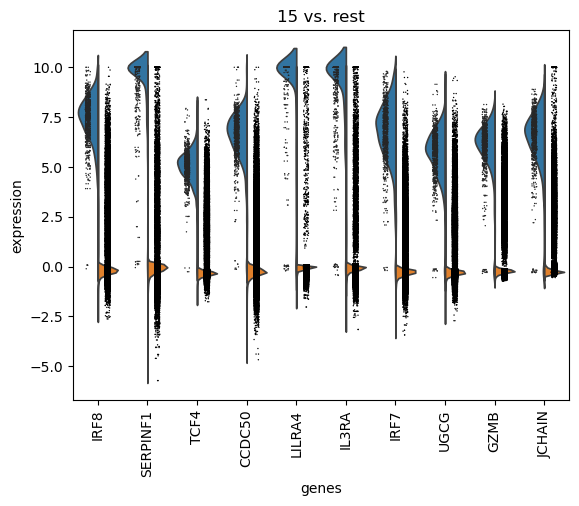

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


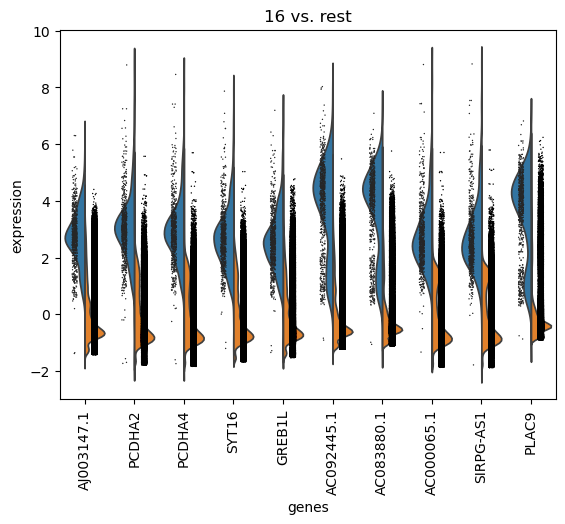

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


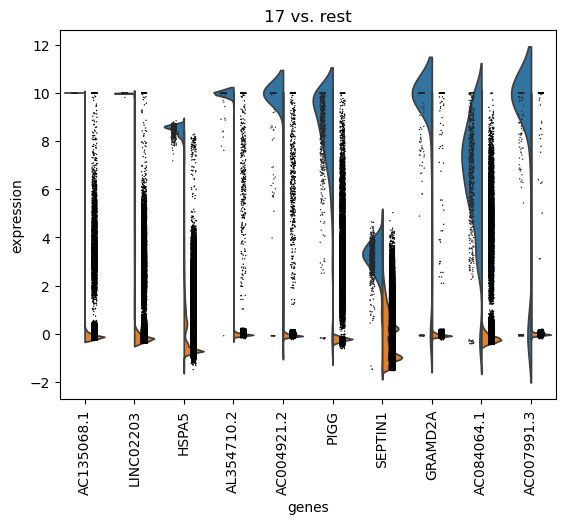

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


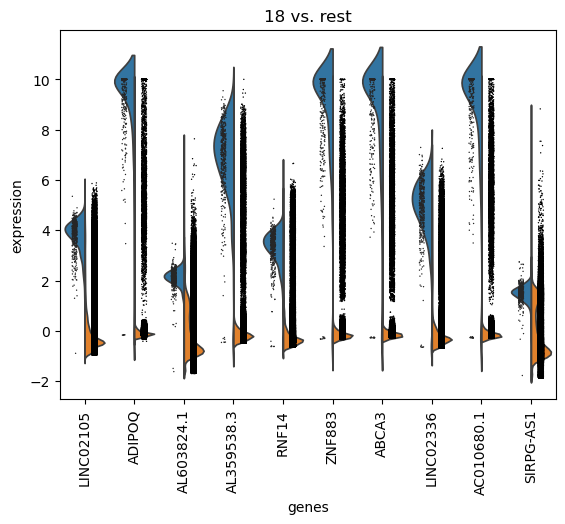

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


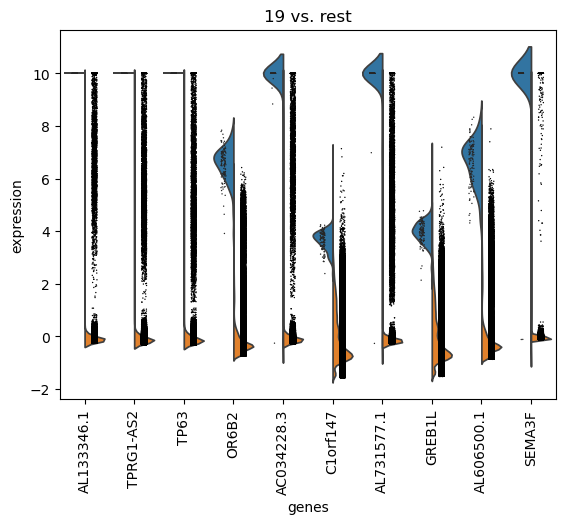

In [26]:
# visualize the clusters genes
sc.pl.rank_genes_groups_violin(adata, n_genes=10)

In [27]:
marker_genes = ['FTH1', 'AC113194.1', 'MGAT4C', 'GZMK', 'SYNE2', 'NKG7', 'MS4A1',
    'LEF1', 'CST3', 'AC006504.7', 'FFAR3', 'SIRPG-AS1', 'LINC02105', 'C1QA', 'FTH1',
    'IRF8', 'AJ003147.1', 'AC135068.1', 'LINC02105', 'AL133346.1']

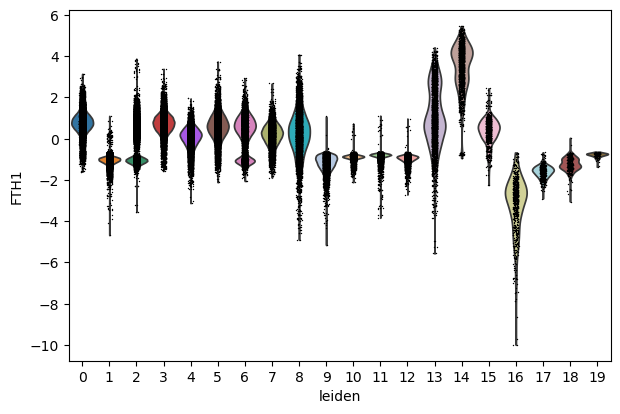

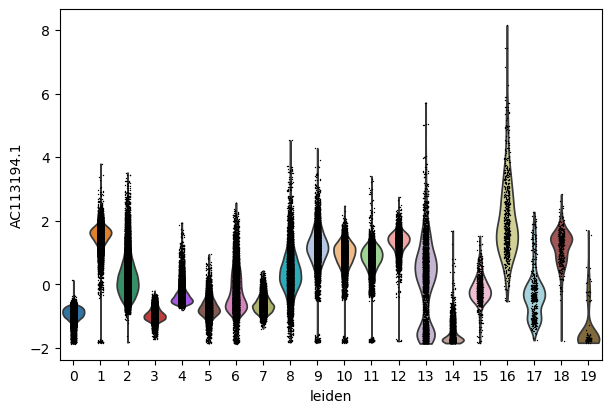

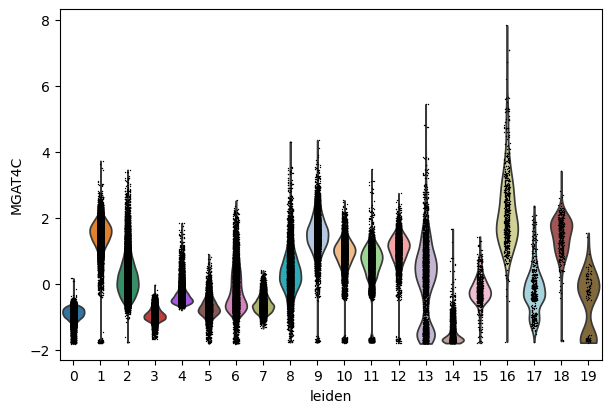

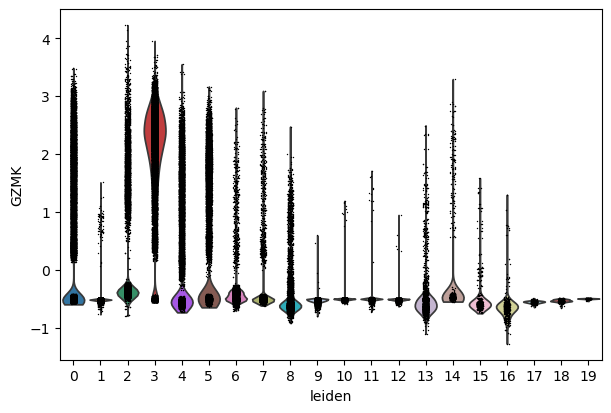

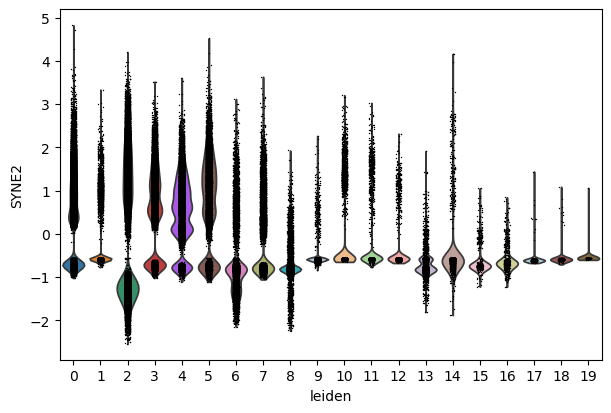

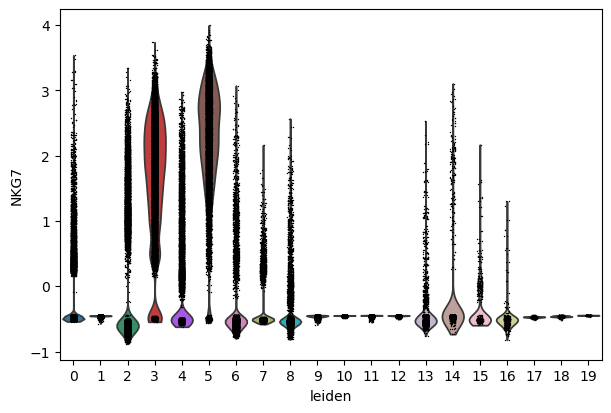

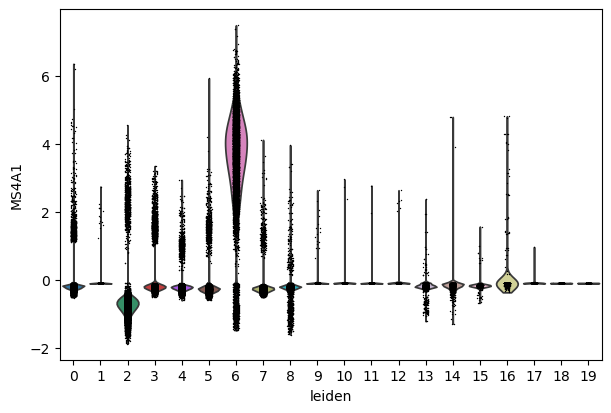

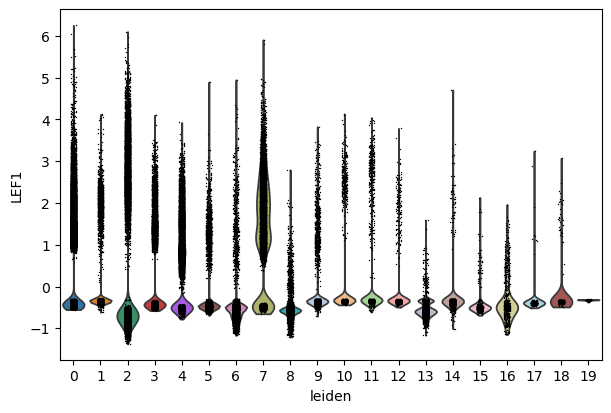

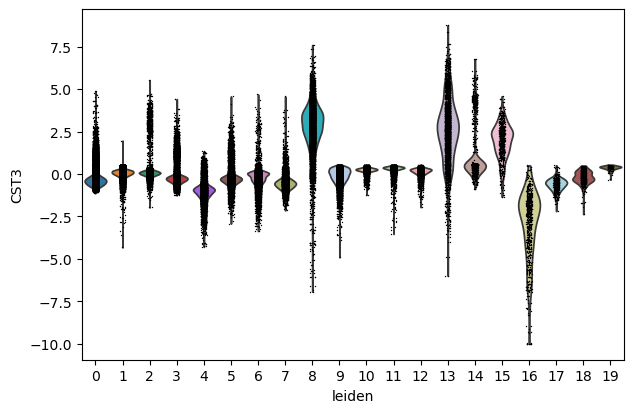

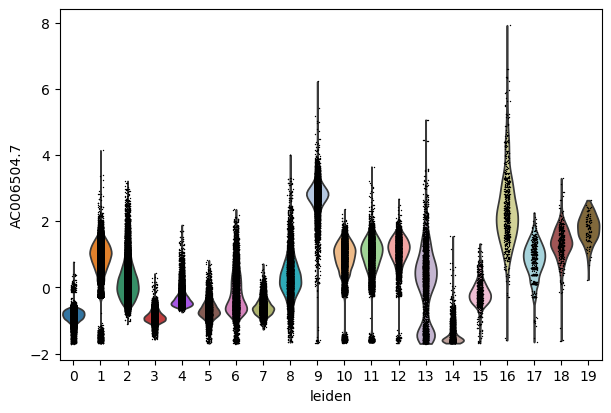

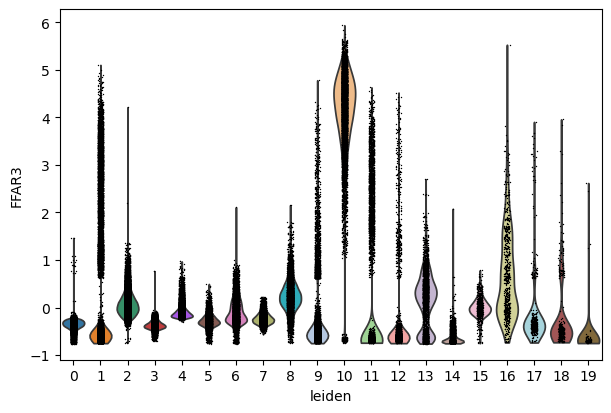

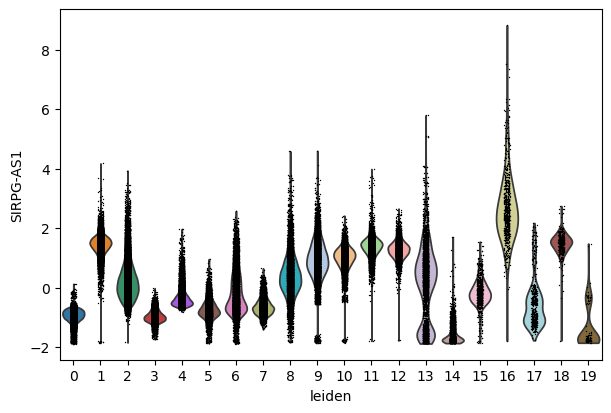

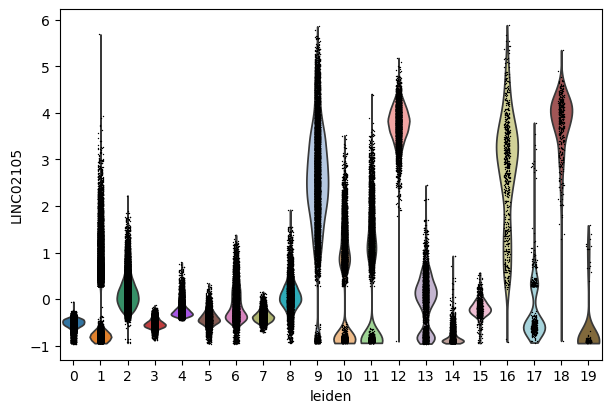

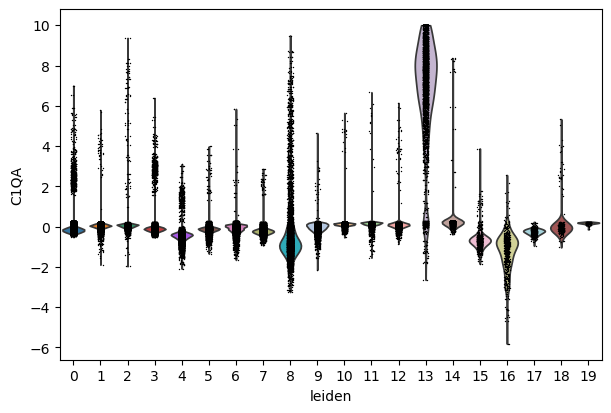

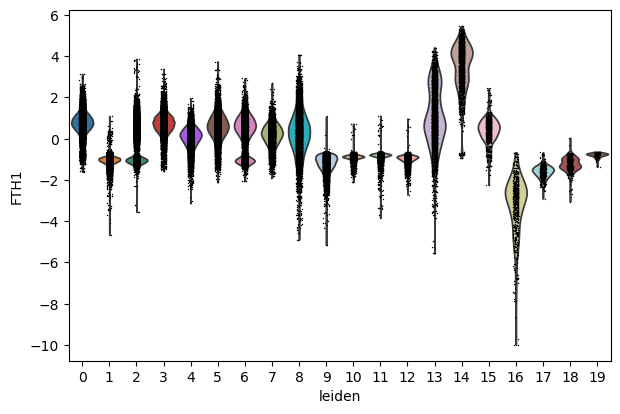

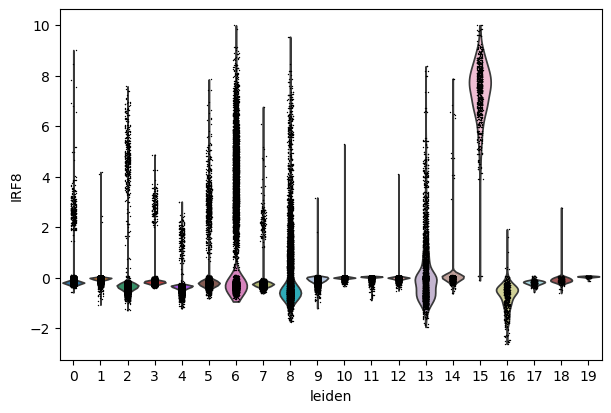

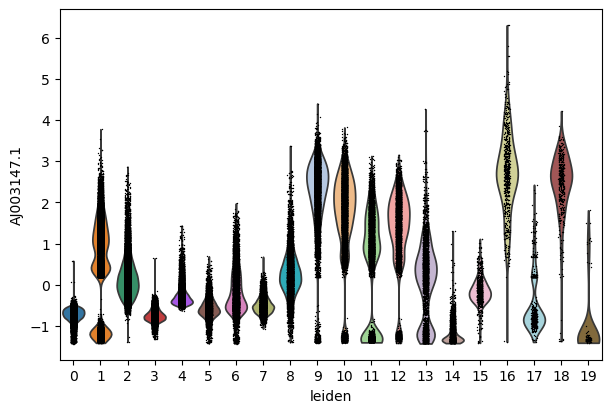

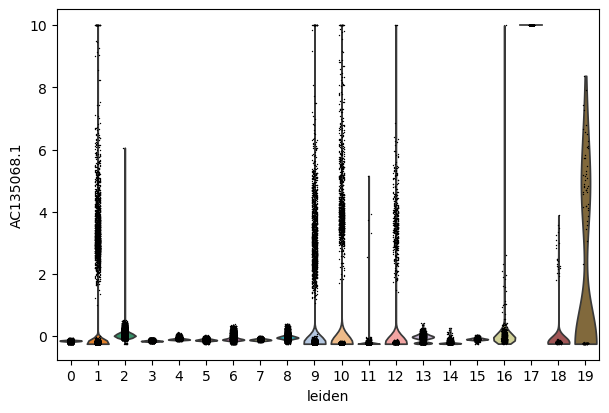

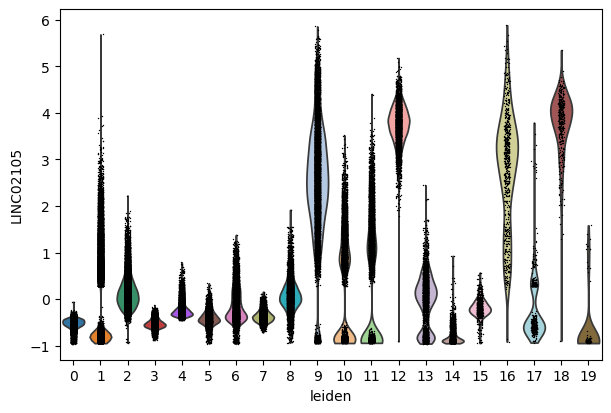

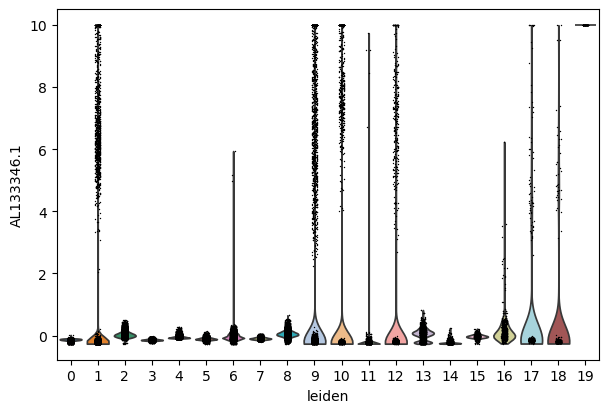

In [28]:
for gene in marker_genes:
    sc.pl.violin(adata, gene, groupby='leiden')

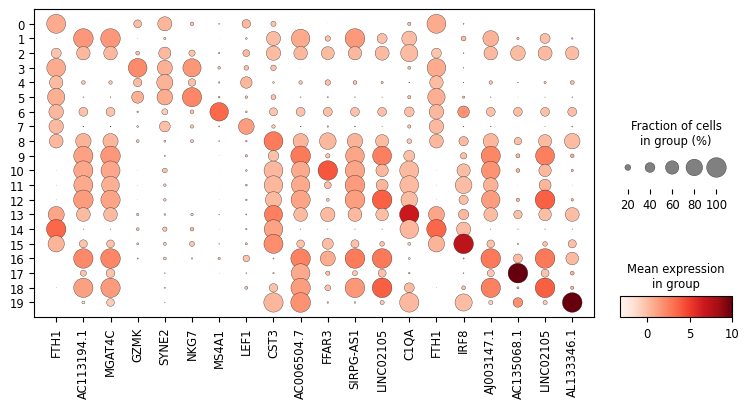

In [42]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden', figsize=(9, 4), dendrogram=False);

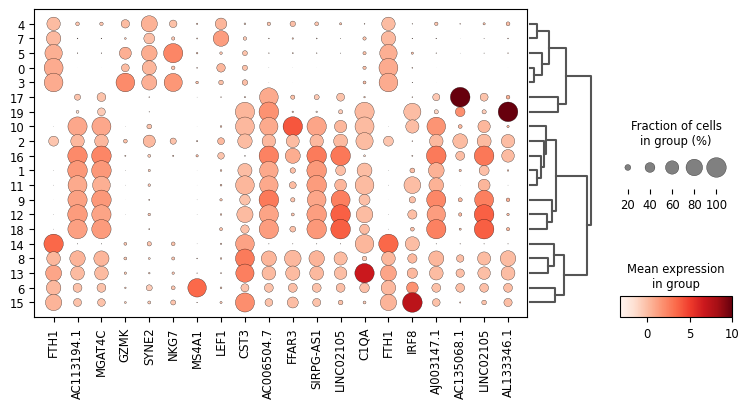

In [44]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden', figsize=(9, 4), dendrogram=True);

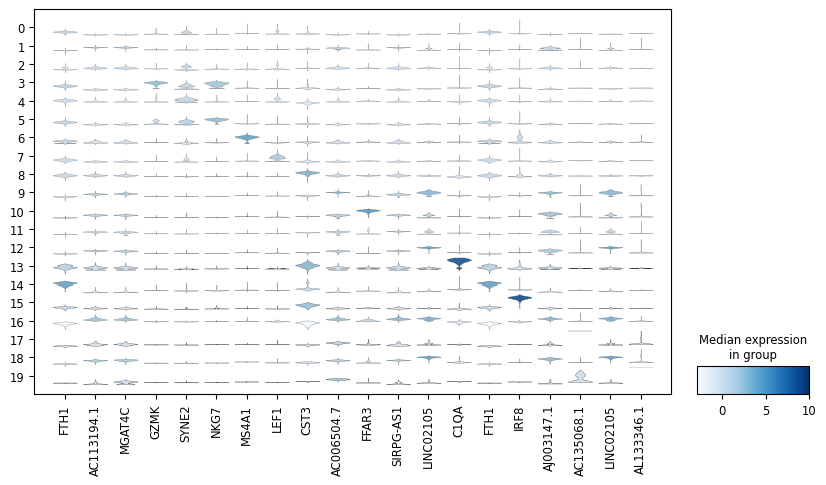

In [46]:
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', figsize=(10, 5), dendrogram=False);

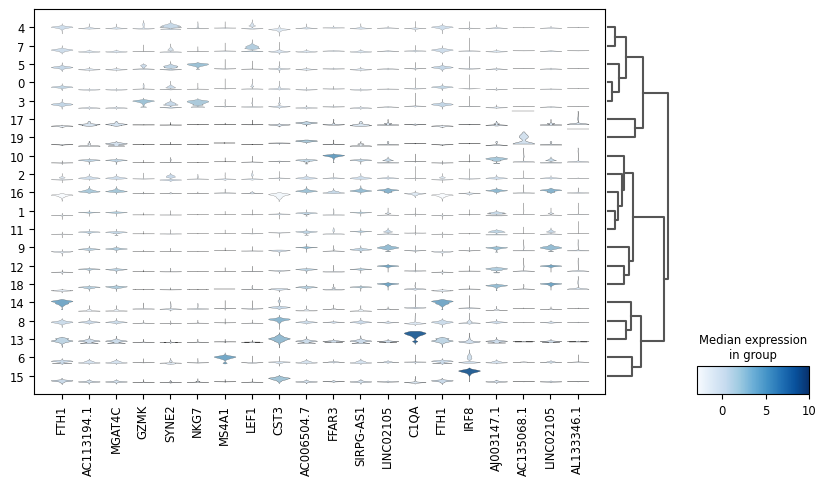

In [47]:
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', figsize=(10, 5), dendrogram=True);

In [38]:
adata.write('write/transcriptomic_preproc_clustering.h5ad')